In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

import matplotlib.pyplot as plt

from torch.utils.data import random_split

import os
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
from PIL import Image
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Lambda

In [2]:
efficientnet = models.efficientnet_v2_m(pretrained=True)
model_aux = nn.Sequential(*list(efficientnet.children())[:-1])


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
lr = 5e-3
epochs = 80

model1 = nn.Sequential(model_aux,
                        nn.Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False),
                        nn.BatchNorm2d(256),
                        nn.Flatten(),
                        nn.Linear(in_features=256, out_features= 256, bias= True), nn.ReLU(),
                        nn.Linear(in_features=256, out_features= 128, bias= True), nn.ReLU(),
                        nn.Linear(in_features=128, out_features= 3, bias= True))

optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

In [4]:
model_path= 'C:/Users/Usuario/Desktop/Resultados/model8.pth'
model1.load_state_dict(torch.load(model_path, map_location=torch.device('cuda')))

<All keys matched successfully>

In [5]:
model1.to(device='cuda')

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, eps=0.001, m

In [6]:
# import os
# import torch
# import torchvision.transforms as T
# from PIL import Image
# import matplotlib.pyplot as plt
# from lime import lime_image
# import sklearn.metrics
# import random
# import numpy as np

# # Definición de la función de transformación de imágenes
# def transform_img_fn(path_list):
#     transform = T.Compose([
#         T.Resize(256),
#         T.ToTensor(),
#         T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     ])

#     out = []
#     for img_path in path_list:
#         img = Image.open(img_path).convert('RGB')  # Convertir a RGB si es necesario
#         out.append(transform(img))
#     return torch.stack(out)

# #label_dict = {0: 'Positiva', 1: 'Indiferente', 2: 'Negativa'}
# label_dict = {'Felicidad':0, 'Diversión':1, 'Indiferencia':2, 'Curiosidad':3, 'Tristeza':4, 'Miedo':5, 'Desagrado':6}

# image_folder = 'C:/Users/Usuario/Desktop/images_or'
# all_images = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
# random.shuffle(all_images)

# class_counts = {0: 0, 1: 0, 2: 0}

# selected_images = []

# # Predicción con el modelo
# model1.eval()
# for img_path in all_images:
#     images = transform_img_fn([img_path])
#     images = images.to(device= 'cuda')
#     with torch.no_grad():
#             outputs = model1(images)
#             _, preds = torch.max(outputs, 1)
#             pred_labels = [label_dict[pred.item()] for pred in preds]
#             if class_counts[preds.item()] < 30:
#                 class_counts[preds.item()] += 1
#                 selected_images.append((img_path))
#             if all(count == 30 for count in class_counts.values()):
#                 break


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
image_folder = 'C:/Users/Usuario/Desktop/selected_images'
selected_images = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]

for i in selected_images: 
    image=Image.open(i) 
    if image.mode != 'RGB':
        print(i)

# selected_images= ['C:/Users/Usuario/Desktop/images_or\\1148.jpg',
#  'C:/Users/Usuario/Desktop/images_or\\671.jpg',
#  'C:/Users/Usuario/Desktop/images_or\\492.jpg',
#  'C:/Users/Usuario/Desktop/images_or\\1031.jpg']

In [11]:
image_folder2 = 'C:/Users/Usuario/Desktop/selected_images2'
selected_images2 = [os.path.join(image_folder2, img) for img in os.listdir(image_folder2)]

for i in selected_images2: 
    image=Image.open(i) 
    if image.mode != 'RGB':
        print(i)

# selected_images= ['C:/Users/Usuario/Desktop/images_or\\1148.jpg',
#  'C:/Users/Usuario/Desktop/images_or\\671.jpg',
#  'C:/Users/Usuario/Desktop/images_or\\492.jpg',
#  'C:/Users/Usuario/Desktop/images_or\\1031.jpg']

In [7]:
import types
from lime.utils.generic_utils import has_arg
from skimage.segmentation import felzenszwalb, slic, quickshift


class BaseWrapper(object):
    """Base class for LIME Scikit-Image wrapper


    Args:
        target_fn: callable function or class instance
        target_params: dict, parameters to pass to the target_fn


    'target_params' takes parameters required to instanciate the
        desired Scikit-Image class/model
    """

    def __init__(self, target_fn=None, **target_params):
        self.target_fn = target_fn
        self.target_params = target_params

    def _check_params(self, parameters):
        """Checks for mistakes in 'parameters'

        Args :
            parameters: dict, parameters to be checked

        Raises :
            ValueError: if any parameter is not a valid argument for the target function
                or the target function is not defined
            TypeError: if argument parameters is not iterable
         """
        a_valid_fn = []
        if self.target_fn is None:
            if callable(self):
                a_valid_fn.append(self.__call__)
            else:
                raise TypeError('invalid argument: tested object is not callable,\
                 please provide a valid target_fn')
        elif isinstance(self.target_fn, types.FunctionType) \
                or isinstance(self.target_fn, types.MethodType):
            a_valid_fn.append(self.target_fn)
        else:
            a_valid_fn.append(self.target_fn.__call__)

        if not isinstance(parameters, str):
            for p in parameters:
                for fn in a_valid_fn:
                    if has_arg(fn, p):
                        pass
                    else:
                        raise ValueError('{} is not a valid parameter'.format(p))
        else:
            raise TypeError('invalid argument: list or dictionnary expected')

    def set_params(self, **params):
        """Sets the parameters of this estimator.
        Args:
            **params: Dictionary of parameter names mapped to their values.

        Raises :
            ValueError: if any parameter is not a valid argument
                for the target function
        """
        self._check_params(params)
        self.target_params = params

    def filter_params(self, fn, override=None):
        """Filters `target_params` and return those in `fn`'s arguments.
        Args:
            fn : arbitrary function
            override: dict, values to override target_params
        Returns:
            result : dict, dictionary containing variables
            in both target_params and fn's arguments.
        """
        override = override or {}
        result = {}
        for name, value in self.target_params.items():
            if has_arg(fn, name):
                result.update({name: value})
        result.update(override)
        return result


class SegmentationAlgorithm(BaseWrapper):
    """ Define the image segmentation function based on Scikit-Image
            implementation and a set of provided parameters

        Args:
            algo_type: string, segmentation algorithm among the following:
                'quickshift', 'slic', 'felzenszwalb'
            target_params: dict, algorithm parameters (valid model paramters
                as define in Scikit-Image documentation)
    """

    def __init__(self, algo_type, **target_params):
        self.algo_type = algo_type
        if (self.algo_type == 'quickshift'):
            BaseWrapper.__init__(self, quickshift, **target_params)
            kwargs = self.filter_params(quickshift)
            self.set_params(**kwargs)
        elif (self.algo_type == 'felzenszwalb'):
            BaseWrapper.__init__(self, felzenszwalb, **target_params)
            kwargs = self.filter_params(felzenszwalb)
            self.set_params(**kwargs)
        elif (self.algo_type == 'slic'):
            BaseWrapper.__init__(self, slic, **target_params)
            kwargs = self.filter_params(slic)
            self.set_params(**kwargs)

    def __call__(self, *args):
        return self.target_fn(args[0], **self.target_params)


100%|██████████| 1000/1000 [00:14<00:00, 68.84it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


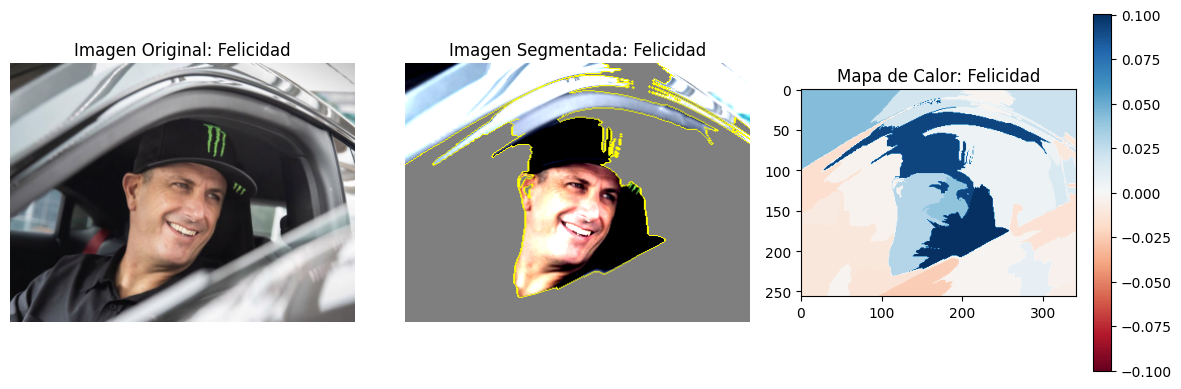

In [17]:
"""Código para ver el comportamiento de cada imagen de manera individual"""

# import os
# import torch
# import torchvision.transforms as T
# from PIL import Image
# import matplotlib.pyplot as plt
# from lime import lime_image
# import sklearn.metrics
# from skimage.segmentation import mark_boundaries
# from skimage.segmentation import felzenszwalb, slic, quickshift


# # Definición de la función de transformación de imágenes
# def transform_img_fn(path_list):
#     transform = T.Compose([
#         T.Resize(256),
#         T.ToTensor(),
#         T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     ])

#     out = [transform(Image.open(img_path)) for img_path in path_list]
#     return torch.stack(out)

# images = transform_img_fn([os.path.join('C:/Users/Usuario/Desktop/images_or/27.jpg')])
# images = images.to(device='cuda')

# #label_dict = {0: 'Positiva', 1: 'Indiferente', 2: 'Negativa'}
# label_dict = {0:'Felicidad', 1:'Diversión', 2:'Indiferencia', 3: 'Curiosidad', 4: 'Tristeza', 5:'Miedo', 6: 'Desagrado'}

# # Definición de la función de predicción para LIME
# def predict(input):
#     input = torch.from_numpy(input).type(torch.FloatTensor)
#     input = input.to(device='cuda').permute(0, 3, 1, 2)
#     model1.eval()
#     with torch.no_grad():
#         predictions = model1(input)
#     probabilities = torch.nn.functional.softmax(predictions, dim=1)
#     return probabilities.cpu().numpy()

# # Uso de LIME para explicar la predicción
# segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=6,
#                                                     max_dist=300, ratio=0.3,
#                                                     random_seed=0)
# explainer = lime_image.LimeImageExplainer()
# images = images.permute(0, 2, 3, 1)
# explanation = explainer.explain_instance(images[0].cpu().numpy().astype('double'), predict, top_labels=1, hide_color=0, num_samples=1000, segmentation_fn=segmentation_fn)

# temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=7, hide_rest=True)
# ind =  explanation.top_labels[0]

# dict_heatmap = dict(explanation.local_exp[ind])
# heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

# fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# # imagen original
# img = images[0].cpu().numpy()
# img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Desnormalización
# axs[0].imshow(img)
# axs[0].set_title(f"Imagen Original: {label_dict[ind]}")
# axs[0].axis("off")

# # imagen segmentada
# axs[1].imshow(mark_boundaries(temp / 2 + 0.5, mask))
# axs[1].set_title(f"Imagen Segmentada: {label_dict[ind]}")
# axs[1].axis("off")

# # imagen mapa de calor
# im = axs[2].imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
# axs[2].set_title(f"Mapa de Calor: {label_dict[ind]}")
# fig.colorbar(im, ax=axs[2])

# plt.tight_layout()
# # plt.savefig(f"C:/Users/Usuario/Desktop/Lime3_1_5000_efficientnet/{os.path.basename(images)}")
# # plt.close()


In [ ]:
"""Código de optimización de quickshift"""

import os
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from lime import lime_image
import sklearn.metrics
from skimage.segmentation import mark_boundaries
from skimage.segmentation import felzenszwalb, slic, quickshift

# Definición de la función de transformación de imágenes
def transform_img_fn(path_list):
    transform = T.Compose([
        T.Resize(256),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    out = [transform(Image.open(img_path)) for img_path in path_list]
    return torch.stack(out)

images = transform_img_fn([os.path.join('C:/Users/Usuario/Desktop/images_or/686.jpg')])
images = images.to(device='cuda')

label_dict = {0: 'Positiva', 1: 'Indiferente', 2: 'Negativa'}

# Definición de la función de predicción para LIME
def predict(input):
    input = torch.from_numpy(input).type(torch.FloatTensor)
    input = input.to(device='cuda').permute(0, 3, 1, 2)
    model1.eval()
    with torch.no_grad():
        predictions = model1(input)
    probabilities = torch.nn.functional.softmax(predictions, dim=1)
    return probabilities.cpu().numpy()

# Rangos de hiperparámetros
kernel_sizes = range(1, 11)
max_dists = range(100, 501, 100)
ratios = [i / 10.0 for i in range(1, 11)]

# Directorio para guardar las imágenes
output_dir = 'C:/Users/Usuario/Desktop/Lime_1/'

# Bucles anidados para probar todas las combinaciones de hiperparámetros
for kernel_size in kernel_sizes:
    for max_dist in max_dists:
        for ratio in ratios:
            segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=kernel_size,
                                                    max_dist=max_dist, ratio=ratio,
                                                    random_seed=0)
            explainer = lime_image.LimeImageExplainer()
            images_perm = images.permute(0, 2, 3, 1)
            explanation = explainer.explain_instance(images_perm[0].cpu().numpy().astype('double'), predict, top_labels=1, hide_color=0, num_samples=1000, segmentation_fn=segmentation_fn)

            temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=7, hide_rest=True)
            ind =  explanation.top_labels[0]

            dict_heatmap = dict(explanation.local_exp[ind])
            heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

            fig, axs = plt.subplots(1, 3, figsize=(12, 4))

            # imagen original
            img = images_perm[0].cpu().numpy()
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Desnormalización
            axs[0].imshow(img)
            axs[0].set_title(f"Imagen Original: {label_dict[ind]}")
            axs[0].axis("off")

            # imagen segmentada
            axs[1].imshow(mark_boundaries(temp / 2 + 0.5, mask))
            axs[1].set_title(f"Imagen Segmentada: {label_dict[ind]}")
            axs[1].axis("off")

            # imagen mapa de calor
            im = axs[2].imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
            axs[2].set_title(f"Mapa de Calor: {label_dict[ind]}")
            fig.colorbar(im, ax=axs[2])

            plt.tight_layout()

            # Guardar la figura con un nombre que incluye los hiperparámetros
            filename = f"kernel_size_{kernel_size}_max_dist_{max_dist}_ratio_{ratio}.jpg"
            plt.savefig(os.path.join(output_dir, filename))

            plt.close()


In [8]:
"""Código de optimización de num samples y batch size"""

import os
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from lime import lime_image
import sklearn.metrics
from skimage.segmentation import mark_boundaries
from skimage.segmentation import felzenszwalb, slic, quickshift

# Definición de la función de transformación de imágenes
def transform_img_fn(path_list):
    transform = T.Compose([
        T.Resize(256),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    out = [transform(Image.open(img_path)) for img_path in path_list]
    return torch.stack(out)

images = transform_img_fn([os.path.join('C:/Users/Usuario/Desktop/images_or/686.jpg')])
images = images.to(device='cuda')

label_dict = {0: 'Positiva', 1: 'Indiferente', 2: 'Negativa'}

# Definición de la función de predicción para LIME
def predict(input):
    input = torch.from_numpy(input).type(torch.FloatTensor)
    input = input.to(device='cuda').permute(0, 3, 1, 2)
    model1.eval()
    with torch.no_grad():
        predictions = model1(input)
    probabilities = torch.nn.functional.softmax(predictions, dim=1)
    return probabilities.cpu().numpy()

# Rangos de hiperparámetros
num_samples = [1000, 3000, 5000]
batch_sizes = [5, 10, 15, 20]

# Hiperparámetros fijos para quickshift
kernel_size = 6
max_dist = 300
ratio = 0.3

output_dir = 'C:/Users/Usuario/Desktop/Lime_2/'

# Bucles anidados para probar todas las combinaciones de hiperparámetros
for num_sample in num_samples:
    for batch_size in batch_sizes:
        segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=kernel_size,
                                                max_dist=max_dist, ratio=ratio,
                                                random_seed=0)
        explainer = lime_image.LimeImageExplainer()
        images_perm = images.permute(0, 2, 3, 1)
        explanation = explainer.explain_instance(images_perm[0].cpu().numpy().astype('double'), predict, top_labels=1, hide_color=0, num_samples=num_sample, batch_size=batch_size, segmentation_fn=segmentation_fn)

        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=7, hide_rest=True)
        ind =  explanation.top_labels[0]

        dict_heatmap = dict(explanation.local_exp[ind])
        heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

        fig, axs = plt.subplots(1, 3, figsize=(12, 4))

        # imagen original
        img = images_perm[0].cpu().numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Desnormalización
        axs[0].imshow(img)
        axs[0].set_title(f"Imagen Original: {label_dict[ind]}")
        axs[0].axis("off")

        # imagen segmentada
        axs[1].imshow(mark_boundaries(temp / 2 + 0.5, mask))
        axs[1].set_title(f"Imagen Segmentada: {label_dict[ind]}")
        axs[1].axis("off")

        # imagen mapa de calor
        im = axs[2].imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
        axs[2].set_title(f"Mapa de Calor: {label_dict[ind]}")
        fig.colorbar(im, ax=axs[2])

        plt.tight_layout()

        # Guardar la figura con un nombre que incluye los hiperparámetros
        filename = f"num_samples_{num_sample}_batch_size_{batch_size}.jpg"
        plt.savefig(os.path.join(output_dir, filename))

        plt.close()


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1000/1000 [00:14<00:00, 68.06it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:13<00:00, 76.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:12<00:00, 81.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:12<00:00, 81.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 3000/3000 [00:41<00:00, 73.03it/s]
Clipping input data 

In [12]:
from skimage.segmentation import mark_boundaries
from lime import lime_image
import os
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from lime import lime_image
import sklearn.metrics
from skimage.segmentation import mark_boundaries

def transform_img_fn(path_list):
    transform = T.Compose([
        T.Resize(256),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    out = [transform(Image.open(img_path)) for img_path in path_list]
    return torch.stack(out)

label_dict = {0: 'Positiva', 1: 'Indiferente', 2: 'Negativa'}

# Definición de la función de predicción para LIME
def predict(input):
    input = torch.from_numpy(input).type(torch.FloatTensor)
    input = input.to(device= 'cuda').permute(0, 3, 1, 2)
    model1.eval()
    with torch.no_grad():
        predictions = model1(input)
    probabilities = torch.nn.functional.softmax(predictions, dim=1)
    return probabilities.cpu().numpy()


segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=6,
                                                    max_dist=300, ratio=0.3,
                                                    random_seed=0)

explainer = lime_image.LimeImageExplainer()

for img_path in selected_images2:
    images = transform_img_fn([img_path])
    images = images.to(device='cuda')
    images = images.permute(0, 2, 3, 1) #En pytorch, las imágenes suelen tener la forma (batch_size, channels, height, width), pero LIME espera imágenes en el formato (batch_size, height, width, channels)
    explanation = explainer.explain_instance(images[0].cpu().numpy().astype('double'), predict, top_labels=1, hide_color=0, num_samples=1000, batch_size=5, segmentation_fn=segmentation_fn)
    #top_labels: determina para cuántas de las principales clases (las clases con las probabilidades más altas predichas por el modelo) se deben generar explicaciones. 
    #Con top_labels=1, LIME sólo generará una explicación para la clase con la mayor probabilidad predicha por el modelo.
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=7, hide_rest=True)

    #Select the same class explained on the figures above.
    ind =  explanation.top_labels[0] #da la etiqueta de la clase que el modelo predice con mayor confianza para la imagen.
                            
    #Map each explanation weight to the corresponding superpixel
    dict_heatmap = dict(explanation.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

    plt.figure(figsize=(12, 4))

    # imagen original
    plt.subplot(131)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Imagen Original: {label_dict[ind]}")
    plt.axis("off")

    # imagen segmentada
    plt.subplot(132)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f"Imagen Segmentada: {label_dict[ind]}")
    plt.axis("off")

    # imagen mapa de calor
    plt.subplot(133)
    plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
    plt.title(f"Mapa de Calor: {label_dict[ind]}")
    plt.colorbar()

    plt.tight_layout()
    plt.savefig(f"C:/Users/Usuario/Desktop/Lime_0/{os.path.basename(img_path)}")
    plt.close()



100%|██████████| 1000/1000 [00:13<00:00, 73.74it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:12<00:00, 77.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:15<00:00, 65.93it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:10<00:00, 93.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:13<00:00, 75.99it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [00:12<00:00, 77.00it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 1000/1000 [